### Import liabraries

In [2]:
import pandas as pd


### Read data from csv

In [3]:
df = pd.read_csv("Data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Call test train split function

In [5]:
from sklearn.model_selection import train_test_split
x=df.drop(["Time","Class"],axis=1)
y= df["Class"]

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

<i>The stratify parameter in train_test_split ensures that the training and test sets have the same proportions of each class. <br>
This is important because it prevents the model from being biased towards any particular class. <br>
The random_state parameter is used to control the randomness of the split. This can be useful for ensuring that the results are reproducible.</i>

### Call logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0,max_iter=5000)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=5000, random_state=0)

#### 
Logistic regression is a statistical model that is used to predict the probability of an event occurring. It is a type of regression analysis that uses a logistic function to model the probability of a binary outcome. The logistic function is a sigmoid function that maps any real number to a value between 0 and 1. This means that the output of a logistic regression model can be interpreted as the probability of the event occurring.

Logistic regression is a supervised learning algorithm, which means that it requires labeled data to train. The labeled data consists of a set of input features and a target variable. The input features are the variables that are used to predict the probability of the event occurring. The target variable is the variable that is being predicted.

## max_iter specifies the maximum number of iterations allowed to converge on a solution when fitting the logistic function to a dataset. The default is 100, which isn’t enough in this example. Raising the limit to 5,000 gives the internal solver the headroom it needs to find a solution.

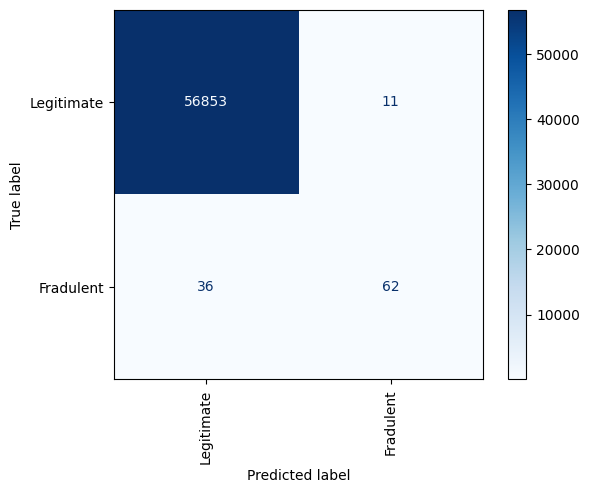

In [11]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
labels= ["Legitimate","Fradulent"]
cmd.from_estimator(lr_model,x_test,y_test,display_labels=labels,cmap="Blues",xticks_rotation="vertical")

### A logistic regression model correctly identified 56,853 transactions as legitimate while misclassifying legitimate transactions as fraudulent just 11 times. 



### Lets do it with RandomForestClassifier

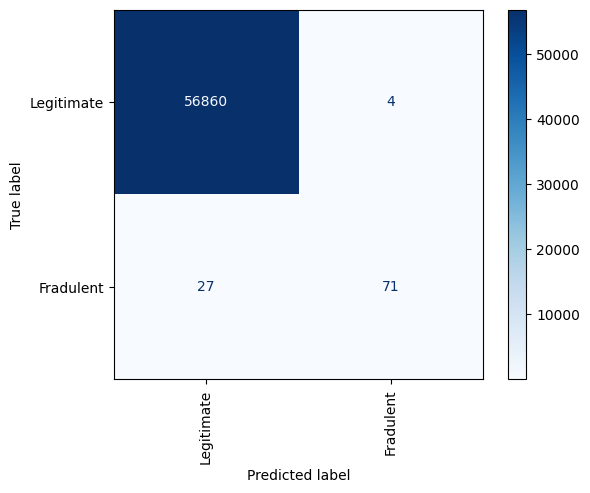

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train,y_train)
cmd.from_estimator(rf_model,x_test,y_test,display_labels=labels,cmap="Blues",xticks_rotation="vertical")

### Let's do it with GradientBoostingClassifier

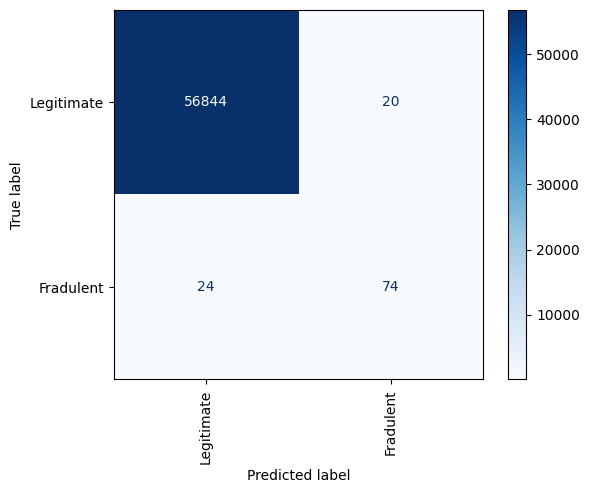

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train,y_train)
cmd.from_estimator(gbm_model,x_test,y_test,display_labels=labels,cmap="Blues",xticks_rotation="vertical")

In [15]:
from sklearn.metrics import precision_score,recall_score
y_pred = rf_model.predict(x_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
sensitivity = recall
specificity = recall_score(y_test,y_pred,pos_label=0)

In [16]:
print(f"precision: {precision}")
print(f"recall: {precision}")
print(f"sensitivity: {sensitivity}")
print(f"specificity: {specificity}")

precision: 0.9466666666666667
recall: 0.9466666666666667
sensitivity: 0.7244897959183674
specificity: 0.9999296567248172
